Plots.AnimatedGif("/home/szmlb/workspace/github/code-practice/julia/detailed_probo/src/section_advanced_localization/tmp.gif")
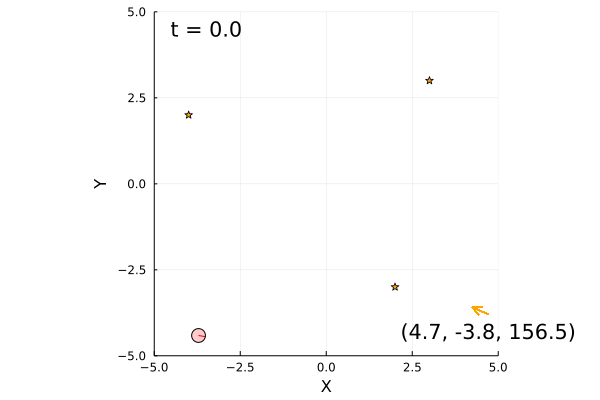

In [4]:
include("../scripts/mcl.jl")
using .MclWorld
using Distributions

function trial(animation=true)

    time_interval = 0.1    
    world = MclWorld.World(30, 0.1)

    ### 地図を生成して2つランドマークを追加 ###
    m = MclWorld.Map()
    MclWorld.append(m, MclWorld.Landmark([-4, 2]))
    MclWorld.append(m, MclWorld.Landmark([2, -3]))
    MclWorld.append(m, MclWorld.Landmark([3, 3]))
    MclWorld.append(world, m)

    initial_pose = [rand(Uniform(-5, 5)), rand(Uniform(-5, 5)), rand(Uniform(-pi, pi))]
    robot_pose = [rand(Uniform(-5, 5)), rand(Uniform(-5, 5)), rand(Uniform(-pi, pi))]

    pf = MclWorld.Mcl(initial_pose, 100, map=m)
    a = MclWorld.EstimationAgent(time_interval, 0.2, 10.0/180.0*pi, pf)
    r = MclWorld.RealRobot(robot_pose, :red, 0.2, a, sensor=MclWorld.RealCamera(m))
    MclWorld.append(world, r)

    if animation
        MclWorld.draw(world)
    else
        MclWorld.draw(world)
        return r.pose, pf.ml.pose
    end
end

trial()